## Подготовка

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import re

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import silhouette_score

from sklearn.preprocessing import PolynomialFeatures

In [2]:
link = r"C:\Users\Asus\Jupyter Lab\Home work with ITA\credit_train_after_processing.csv"
# все данные 
all_data = pd.read_csv(filepath_or_buffer=link, index_col='Unnamed: 0')

data = all_data.sample(n=5000, random_state=23)
# выделяю X и y 
y = data.open_account_flg.to_frame()
X = data.drop(columns='open_account_flg')
# выведу 5 строк данных
del all_data
X.head()

,gender_M,gender_F,age,marital_status_WID,marital_status_UNM,marital_status_MAR,marital_status_DIV,marital_status_CIV,job_position_WRP,job_position_WRK,...,living_region_АСТРАХАНСКАЯ,living_region_АРХАНГЕЛЬСКАЯ,living_region_АМУРСКАЯ,living_region_АЛТАЙСКИЙ,living_region_АЛТАЙ,living_region_АДЫГЕЯ,living_region_OTHER,monthly_income,credit_count,overdue_credit_count
41202,0,1,45.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,30000.0,0.0,0.0
157836,1,0,32.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,35000.0,2.0,0.0
113314,0,1,39.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,30000.0,3.0,0.0
158150,0,1,50.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,28000.0,0.0,0.0
122652,0,1,31.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,60000.0,3.0,0.0


## Предварительная оценка данных

### StandardScaler к не бинарным данным

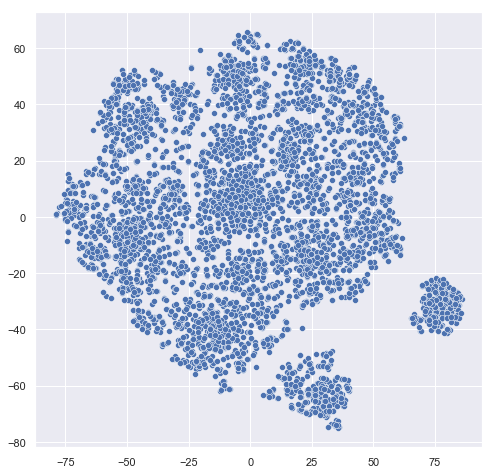

In [4]:
scaler = StandardScaler()

# копия данных 
X_scaler_not_bin_data = X.copy()

# низвания не бинарных столбцов, которые будут скалирвоаны
continuous_variable_names = ['age', 'monthly_income', 'credit_count',
                             'overdue_credit_count', 'credit_sum', 'credit_month', 'score_shk']

# скалирование не бинарных столбцов
X_scaler_not_bin_data[continuous_variable_names] = scaler.fit_transform(X[continuous_variable_names])

# tsne для визуализации
tsne = TSNE()
X_tsne_scaler_not_bin_data = tsne.fit_transform(X_scaler_not_bin_data)

# визуализация
sns.set(rc={'figure.figsize':(8,8)})
sns.scatterplot(x=X_tsne_scaler_not_bin_data[:, 0], y=X_tsne_scaler_not_bin_data[:, 1]);

### Приминение нормализации MinMaxScaler

Для примера работы нормализации  выполню нормализацию с помощью `MinMaxScaler` всех данных.

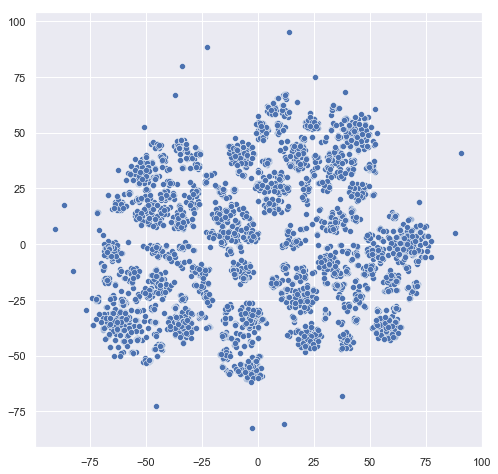

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# создаю нормализованые даные. все бинарные данные также можно нормализировать, они расположатся в пределах 0-1
X_minmax_scaler = scaler.fit_transform(X)

tsne = TSNE()
X_tsne_minmax_scaler = tsne.fit_transform(X_minmax_scaler)
sns.set(rc={'figure.figsize':(8,8)})
sns.scatterplot(x=X_tsne_minmax_scaler[:, 0], y=X_tsne_minmax_scaler[:, 1]);

## Кластеризация на данных с `MinMaxScaler` и `StandartScaler`

### `K-Means` для данных псоле `StandartScaler`

`X_scaler_not_bin_data` - данные, в которых произведена стандартизация `StandartScaler` на небинарных данных 

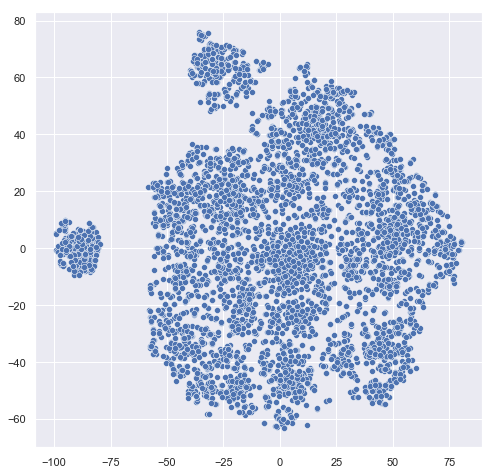

In [6]:
# Применяю PCA, для PCA не установлено оптимальное число компанент 
pca = PCA()
pca.fit(X_scaler_not_bin_data)
X_scaler_not_bin_data_pca = pca.transform(X_scaler_not_bin_data)

# TSNE к данным после PCA для визуализации
tsne = TSNE()
X_scaler_not_bin_data_pca_tsne = tsne.fit_transform(X_scaler_not_bin_data_pca)
sns.set(rc={'figure.figsize':(8,8)})
sns.scatterplot(x=X_scaler_not_bin_data_pca_tsne[:, 0], y=X_scaler_not_bin_data_pca_tsne[:, 1]);

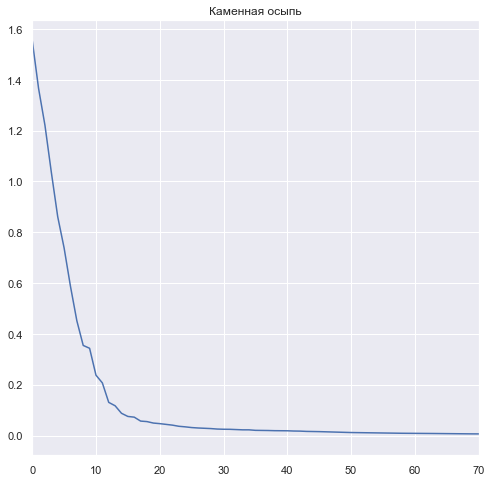

In [7]:
# Построение каменной осыпи
plt.plot(pca.explained_variance_)
plt.title(label='Каменная осыпь')
plt.xlim(0, 70);

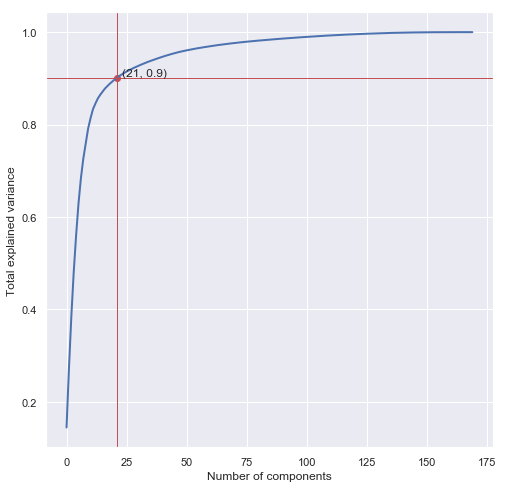

In [8]:
pca_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(pca_explained_variance_ratio, lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
optimal = (np.where(pca_explained_variance_ratio ==
                    pca_explained_variance_ratio[pca_explained_variance_ratio>0.9][0])[0][0], 0.9)
plt.axvline(optimal[0], c='r', lw=1)
plt.axhline(optimal[1], c='r', lw=1)
plt.scatter(x=optimal[0], y=optimal[1], marker='o', c='r', )
plt.annotate(s='{label}'.format(label=optimal),
                 xy=(optimal[0] + 2, optimal[1] + 0.005))
plt.show();

In [9]:
# установив число компанент для PCA удаляем ненужные объекты
del X_scaler_not_bin_data_pca_tsne
del X_scaler_not_bin_data_pca

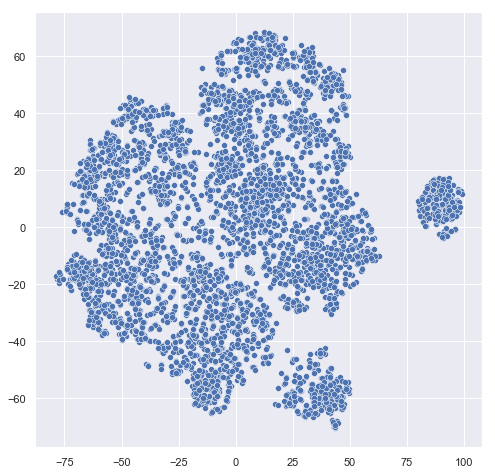

In [10]:
# Применяю PCA с установленным числом компанент
pca = PCA(n_components=21)
pca.fit(X_scaler_not_bin_data)
X_scaler_not_bin_data_pca_20 = pca.transform(X_scaler_not_bin_data)

# Применяю tsne
X_scaler_not_bin_data_pca_20_tsne = tsne.fit_transform(X_scaler_not_bin_data_pca_20)

# визуализирую
sns.set(rc={'figure.figsize':(8,8)})
sns.scatterplot(x=X_scaler_not_bin_data_pca_20_tsne[:, 0], y=X_scaler_not_bin_data_pca_20_tsne[:, 1]);

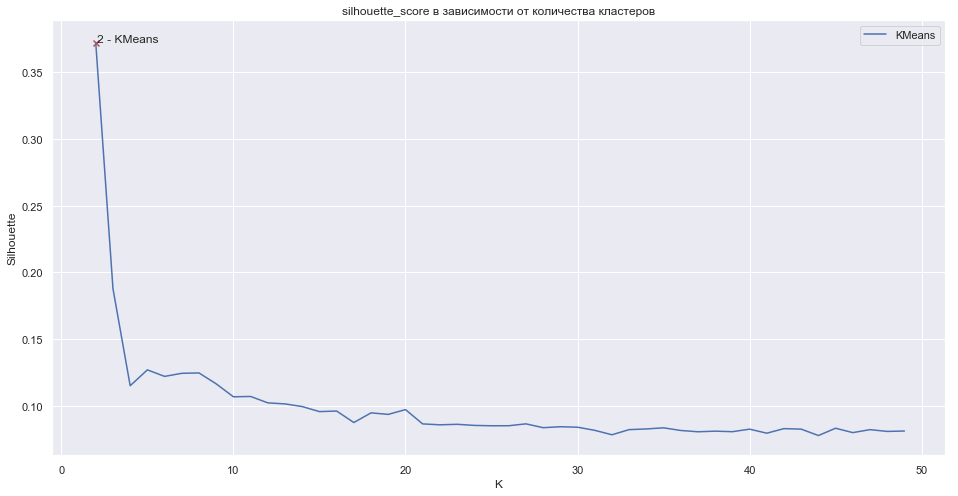

In [11]:
# Применяю данные после подготовки в утсановке оптимального числа кластров для алгоритма KMeans
from sklearn.cluster import KMeans
# для оценки кластеризации буду использовать silhouette_score
from sklearn.metrics import silhouette_score

# список кортежей значений мерики силуэт скор с числом кластеров
silhouette_score_km = [(silhouette_score(X=X_scaler_not_bin_data_pca_20,
                                         labels=KMeans(n_clusters=i).fit_predict(X_scaler_not_bin_data_pca_20)), i)
                       for i in range(2, 50)]

# максимальная метрика silhouette_score
optimal_number_clusters_km = max(silhouette_score_km)

# построение графика изминения silhouette_score от числа кластров в алгоритме KMeans
sns.set(rc={'figure.figsize':(16,8)})
plot_km_y, plot_km_x = [i[0] for i in silhouette_score_km], [i[1] for i in silhouette_score_km]
plt.plot(plot_km_x, plot_km_y, label='KMeans')
plt.xlabel("K");
plt.ylabel("Silhouette");
plt.title('silhouette_score в зависимости от количества кластеров')

plt.scatter(x=optimal_number_clusters_km[1], y=optimal_number_clusters_km[0], marker='x', c='r')
plt.annotate(s='{label} - KMeans'.format(label=optimal_number_clusters_km[1]),
             xy=(optimal_number_clusters_km[1] + 0.05, optimal_number_clusters_km[0] + 0.0005))

plt.legend(['KMeans']);

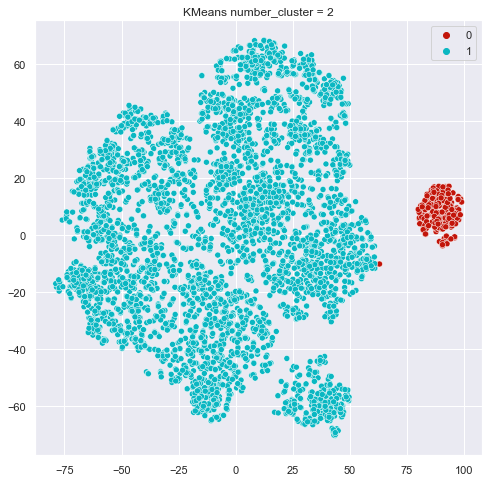

In [12]:
km = KMeans(n_clusters=2)
predict_km = km.fit_predict(X_scaler_not_bin_data_pca_20)

palette = sns.hls_palette(km.n_clusters, l=.4, s=.9)
sns.set(rc={'figure.figsize':(8,8)})
sns.scatterplot(x=X_scaler_not_bin_data_pca_20_tsne[:, 0], y=X_scaler_not_bin_data_pca_20_tsne[:, 1],
                hue=predict_km, palette=palette)
plt.title(label='{name_alg} number_cluster = {n}'.format(name_alg='KMeans', n=km.n_clusters));

In [13]:
data_client_profile = data.copy()

data_client_profile.insert(loc=2,
                    column='gave_creedite',
                    value=data_client_profile['open_account_flg'].values)

data_client_profile.insert(loc=2,
                    column='didnt_give_creedit',
                    value=data_client_profile['open_account_flg'].map(lambda x: 0 if x == 1 else 1).values)
data_client_profile.drop(columns='open_account_flg', inplace=True)

d1 = {i: lambda x: x.median()
     for i in data_client_profile.columns if (i in continuous_variable_names)}

d2= {i: lambda x: (x.sum()/len(x))*100 for i in data_client_profile.columns if not i in continuous_variable_names}
d1.update(d2)
data_client_profile['predict'] = predict_km

pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

client_profile = data_client_profile.groupby(['predict']).agg(d1)

### max
new_column = ['marital_status', 'job_position', 'tariff_id', 'education', 'living_region']
categorical_groups = {i: [re.sub(pattern=i+'_', repl='', string=j)
                          for j in client_profile.columns if re.match(pattern=i, string=j)] for i in new_column}

new_client_profile=client_profile[['age', 'credit_sum', 'credit_month', 'score_shk',
                                   'monthly_income', 'credit_count', 'overdue_credit_count',
                                   'gender_M', 'gender_F', 'didnt_give_creedit', 'gave_creedite']]

def fun_returning_tags_category(column):
    test = client_profile[[column+'_'+group for group in categorical_groups[column]]]
    test.insert(loc=len(test.columns),
               column=column,
               value=[re.sub(pattern=column+'_',
                             repl='',
                             string=test.loc[i][test.loc[i] == test.loc[i].max()].index[0]) for i in test.index])
    test.drop(columns=[column+'_'+group for group in categorical_groups[column]], inplace=True)
    return test

new_client_profile = pd.concat([new_client_profile]+[fun_returning_tags_category(column=column)
                                                     for column in new_column], axis=1)

c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in longlong_scalars
  from ipykernel import kernelapp as app
c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
client_profile

,age,credit_sum,credit_month,score_shk,monthly_income,credit_count,overdue_credit_count,gender_M,gender_F,didnt_give_creedit,gave_creedite,marital_status_WID,marital_status_UNM,marital_status_MAR,marital_status_DIV,marital_status_CIV,job_position_WRP,job_position_WRK,job_position_WOI,job_position_UMN,job_position_SPC,job_position_PNI,job_position_PNA,job_position_OTHER,job_position_NOR,job_position_INP,job_position_DIR,job_position_BIU,job_position_BIS,job_position_ATP,tariff_id_1.99,tariff_id_1.94,tariff_id_1.91,tariff_id_1.9,tariff_id_1.7,tariff_id_1.6,tariff_id_1.5,tariff_id_1.44,tariff_id_1.43,tariff_id_1.41,tariff_id_1.4,tariff_id_1.32,tariff_id_1.3,tariff_id_1.25,tariff_id_1.24,tariff_id_1.23,tariff_id_1.22,tariff_id_1.21,tariff_id_1.2,tariff_id_1.19,tariff_id_1.17,tariff_id_1.16,tariff_id_1.1,tariff_id_1.0,education_UGR,education_SCH,education_PGR,education_GRD,education_ACD,living_region_ЯРОСЛАВСКАЯОБЛАСТЬ,living_region_ЯРОСЛАВСКАЯ,living_region_ЯМАЛОНЕНЕЦКИЙ,living_region_ЧУКОТСКИЙ,living_region_ЧУВАШСКАЯ,living_region_ЧЕЧЕНСКАЯ,living_region_ЧЕЛЯБИНСКАЯОБЛАСТЬ,living_region_ЧЕЛЯБИНСКАЯ,living_region_ХАНТЫМАНСИЙСКИЙ,living_region_ХАНТЫ-МАНСИЙСКИЙ,living_region_ХАКАСИЯ,living_region_ХАБАРОВСКИЙ,living_region_УЛЬЯНОВСКАЯОБЛАСТЬ,living_region_УЛЬЯНОВСКАЯ,living_region_УДМУРТСКАЯ,living_region_ТЮМЕНСКАЯОБЛАСТЬ,living_region_ТЮМЕНСКАЯ,living_region_ТЫВА,living_region_ТУЛЬСКАЯОБЛАСТЬ,living_region_ТУЛЬСКАЯ,living_region_ТОМСКАЯОБЛАСТЬ,living_region_ТОМСКАЯ,living_region_ТВЕРСКАЯОБЛАСТЬ,living_region_ТВЕРСКАЯ,living_region_ТАТАРСТАН,living_region_ТАМБОВСКАЯОБЛАСТЬ,living_region_ТАМБОВСКАЯ,living_region_СТАВРОПОЛЬСКИЙ,living_region_СМОЛЕНСКАЯОБЛАСТЬ,living_region_СМОЛЕНСКАЯ,living_region_СЕВЕРНАЯОСЕТИЯАЛАНИЯ,living_region_СЕВЕРНАЯОСЕТИЯ-АЛАНИЯ,living_region_СВЕРДЛОВСКАЯОБЛАСТЬ,living_region_СВЕРДЛОВСКАЯ,living_region_САХАЯКУТИЯ,living_region_САХАЛИНСКАЯОБЛАСТЬ,living_region_САХАЛИНСКАЯ,living_region_САХА/ЯКУТИЯ/,living_region_САРАТОВСКАЯОБЛАСТЬ,living_region_САРАТОВСКАЯ,living_region_САНКТПЕТЕРБУРГ,living_region_САМАРСКАЯОБЛАСТЬ,living_region_САМАРСКАЯ,living_region_РЯЗАНСКАЯОБЛАСТЬ,living_region_РЯЗАНСКАЯ,living_region_РОСТОВСКАЯОБЛАСТЬ,living_region_РОСТОВСКАЯ,living_region_ПСКОВСКАЯОБЛАСТЬ,living_region_ПСКОВСКАЯ,living_region_ПРИМОРСКИЙ,living_region_ПЕРМСКИЙ,living_region_ПЕНЗЕНСКАЯОБЛАСТЬ,living_region_ПЕНЗЕНСКАЯ,living_region_ОРЛОВСКАЯОБЛАСТЬ,living_region_ОРЛОВСКАЯ,living_region_ОРЕНБУРГСКАЯОБЛАСТЬ,living_region_ОРЕНБУРГСКАЯ,living_region_ОМСКАЯОБЛАСТЬ,living_region_ОМСКАЯ,living_region_НОВОСИБИРСКАЯ,living_region_НОВГОРОДСКАЯ,living_region_НИЖЕГОРОДСКАЯОБЛАСТЬ,living_region_НИЖЕГОРОДСКАЯ,living_region_НЕНЕЦКИЙ,living_region_МУРМАНСКАЯ,living_region_МОСКОВСКАЯОБЛАСТЬ,living_region_МОСКОВСКАЯ,living_region_МОСКВА,living_region_МОРДОВИЯ,living_region_МАРИЙ,living_region_МАГАДАНСКАЯ,living_region_ЛИПЕЦКАЯ,living_region_ЛЕНИНГРАДСКАЯОБЛАСТЬ,living_region_ЛЕНИНГРАДСКАЯ,living_region_КУРСКАЯОБЛАСТЬ,living_region_КУРСКАЯ,living_region_КУРГАНСКАЯ,living_region_КРАСНОЯРСКИЙ,living_region_КРАСНОДАРСКИЙ,living_region_КОСТРОМСКАЯ,living_region_КОМИ,living_region_КИРОВСКАЯ,living_region_КЕМЕРОВСКАЯ,living_region_КАРЕЛИЯ,living_region_КАРАЧАЕВОЧЕРКЕССКАЯ,living_region_КАМЧАТСКИЙ,living_region_КАЛУЖСКАЯ,living_region_КАЛМЫКИЯ,living_region_КАЛИНИНГРАДСКАЯ,living_region_КАБАРДИНОБАЛКАРСКАЯ,living_region_ИРКУТСКАЯОБЛАСТЬ,living_region_ИРКУТСКАЯ,living_region_ИВАНОВСКАЯ,living_region_ЗАБАЙКАЛЬСКИЙ,living_region_ДАГЕСТАН,living_region_ВОРОНЕЖСКАЯ,living_region_ВОЛОГОДСКАЯОБЛАСТЬ,living_region_ВОЛОГОДСКАЯ,living_region_ВОЛГОГРАДСКАЯОБЛАСТЬ,living_region_ВОЛГОГРАДСКАЯ,living_region_ВЛАДИМИРСКАЯ,living_region_БУРЯТИЯ,living_region_БРЯНСКАЯ,living_region_БЕЛГОРОДСКАЯ,living_region_БАШКОРТОСТАН,living_region_АСТРАХАНСКАЯОБЛАСТЬ,living_region_АСТРАХАНСКАЯ,living_region_АРХАНГЕЛЬСКАЯ,living_region_АМУРСКАЯ,living_region_АЛТАЙСКИЙ,living_region_АЛТАЙ,living_region_АДЫГЕЯ,living_region_OTHER
predict,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [15]:
new_client_profile

,age,credit_sum,credit_month,score_shk,monthly_income,credit_count,overdue_credit_count,gender_M,gender_F,didnt_give_creedit,gave_creedite,marital_status,job_position,tariff_id,education,living_region
predict,,,,,,,,,,,,,,,,
0,35.0,20044.500,10,0.551983,39083.5,3.0,1.0,47.435897,52.564103,81.623932,18.376068,MAR,SPC,1.6,GRD,МОСКОВСКАЯ
1,34.0,21071.335,10,0.457971,35000.0,2.0,0.0,47.922786,52.077214,82.312211,17.687789,MAR,SPC,1.1,SCH,МОСКОВСКАЯ


### `K-Means` для данных псоле `MinMaxScaler`

In [16]:
pca = PCA()
pca.fit(X_minmax_scaler)
X_minmax_scaler_pca = pca.transform(X_minmax_scaler)

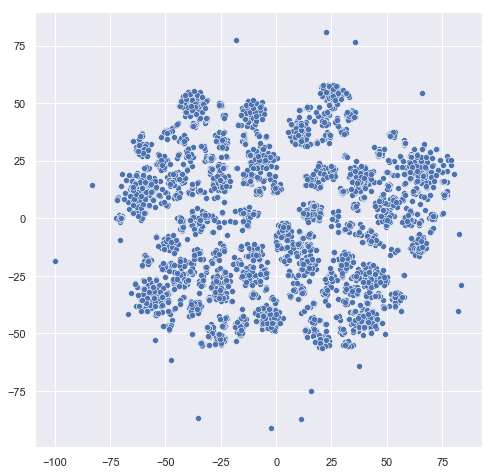

In [17]:
tsne = TSNE()
X_minmax_scaler_pca_tsne = tsne.fit_transform(X_minmax_scaler_pca)
sns.set(rc={'figure.figsize':(8,8)})
sns.scatterplot(x=X_minmax_scaler_pca_tsne[:, 0], y=X_minmax_scaler_pca_tsne[:, 1]);

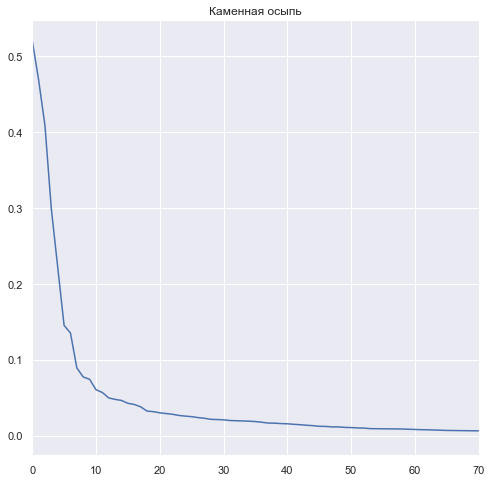

In [18]:
plt.plot(pca.explained_variance_)
plt.title(label='Каменная осыпь')
plt.xlim(0, 70);

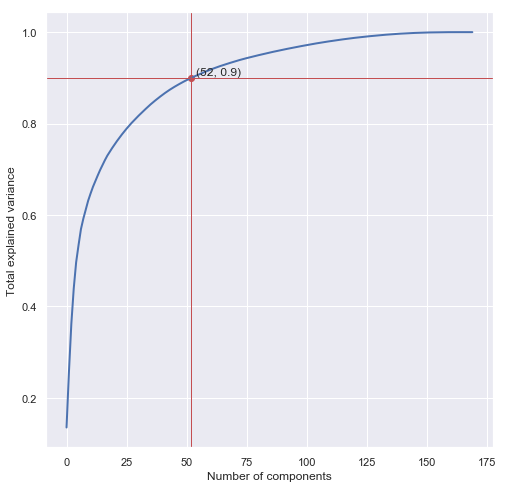

In [19]:
pca_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(pca_explained_variance_ratio, lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
optimal = (np.where(pca_explained_variance_ratio ==
                    pca_explained_variance_ratio[pca_explained_variance_ratio>0.9][0])[0][0], 0.9)
plt.axvline(optimal[0], c='r', lw=1)
plt.axhline(optimal[1], c='r', lw=1)
plt.scatter(x=optimal[0], y=optimal[1], marker='o', c='r', )
plt.annotate(s='{label}'.format(label=optimal),
                 xy=(optimal[0] + 2, optimal[1] + 0.005))
plt.show();

In [20]:
del X_minmax_scaler_pca
del X_minmax_scaler_pca_tsne

In [21]:
pca = PCA(n_components=100)
pca.fit(X_minmax_scaler)
X_minmax_scaler_pca_100 = pca.transform(X_minmax_scaler)
X_minmax_scaler_pca_100_tsne = tsne.fit_transform(X_minmax_scaler_pca_100)

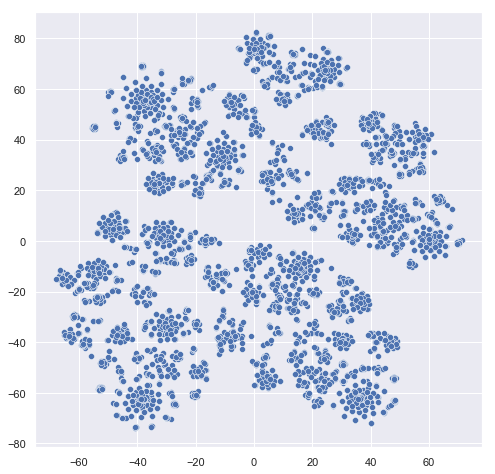

In [22]:
sns.set(rc={'figure.figsize':(8,8)})
sns.scatterplot(x=X_minmax_scaler_pca_100_tsne[:, 0], y=X_minmax_scaler_pca_100_tsne[:, 1]);

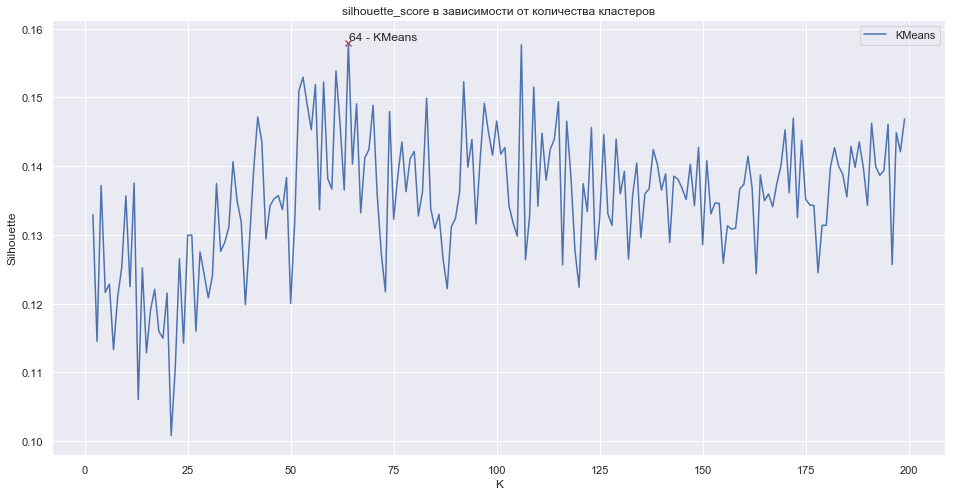

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_score_km = [(silhouette_score(X=X_minmax_scaler_pca_100,
                                         labels=KMeans(n_clusters=i).fit_predict(X_minmax_scaler_pca_100)), i)
                       for i in range(2, 200)]


optimal_number_clusters_km = max(silhouette_score_km)

sns.set(rc={'figure.figsize':(16,8)})
plot_km_y, plot_km_x = [i[0] for i in silhouette_score_km], [i[1] for i in silhouette_score_km]
plt.plot(plot_km_x, plot_km_y, label='KMeans')
plt.xlabel("K");
plt.ylabel("Silhouette");
plt.title('silhouette_score в зависимости от количества кластеров')

plt.scatter(x=optimal_number_clusters_km[1], y=optimal_number_clusters_km[0], marker='x', c='r')
plt.annotate(s='{label} - KMeans'.format(label=optimal_number_clusters_km[1]),
             xy=(optimal_number_clusters_km[1] + 0.05, optimal_number_clusters_km[0] + 0.0005))

plt.legend(['KMeans']);

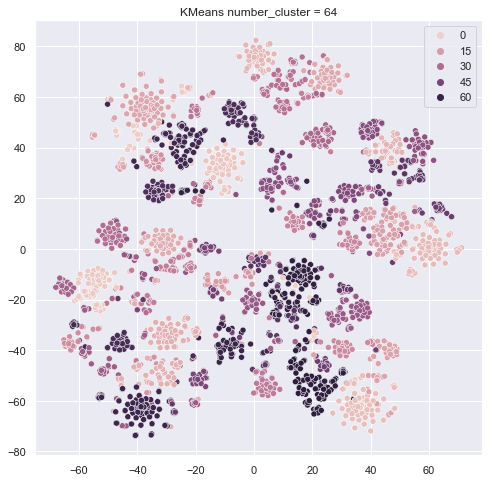

In [24]:
km = KMeans(n_clusters=64)
predict_km = km.fit_predict(X_minmax_scaler_pca_100)

# palette = sns.hls_palette(km.n_clusters, l=.4, s=.9)
sns.set(rc={'figure.figsize':(8,8)})
sns.scatterplot(x=X_minmax_scaler_pca_100_tsne[:, 0], y=X_minmax_scaler_pca_100_tsne[:, 1],
                hue=predict_km)
plt.title(label='{name_alg} number_cluster = {n}'.format(name_alg='KMeans', n=km.n_clusters));

In [25]:
data_client_profile = data.copy()

data_client_profile.insert(loc=2,
                    column='gave_creedite',
                    value=data_client_profile['open_account_flg'].values)

data_client_profile.insert(loc=2,
                    column='didnt_give_creedit',
                    value=data_client_profile['open_account_flg'].map(lambda x: 0 if x == 1 else 1).values)
data_client_profile.drop(columns='open_account_flg', inplace=True)

d1 = {i: lambda x: x.median()
     for i in data_client_profile.columns if (i in continuous_variable_names)}

d2= {i: lambda x: (x.sum()/len(x))*100 for i in data_client_profile.columns if not i in continuous_variable_names}
d1.update(d2)
data_client_profile['predict'] = predict_km

pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

client_profile = data_client_profile.groupby(['predict']).agg(d1)

### max
new_column = ['marital_status', 'job_position', 'tariff_id', 'education', 'living_region']
categorical_groups = {i: [re.sub(pattern=i+'_', repl='', string=j)
                          for j in client_profile.columns if re.match(pattern=i, string=j)] for i in new_column}

new_client_profile=client_profile[['age', 'credit_sum', 'credit_month', 'score_shk',
                                   'monthly_income', 'credit_count', 'overdue_credit_count',
                                   'gender_M', 'gender_F', 'didnt_give_creedit', 'gave_creedite']]

def fun_returning_tags_category(column):
    test = client_profile[[column+'_'+group for group in categorical_groups[column]]]
    test.insert(loc=len(test.columns),
               column=column,
               value=[re.sub(pattern=column+'_',
                             repl='',
                             string=test.loc[i][test.loc[i] == test.loc[i].max()].index[0]) for i in test.index])
    test.drop(columns=[column+'_'+group for group in categorical_groups[column]], inplace=True)
    return test

new_client_profile = pd.concat([new_client_profile]+[fun_returning_tags_category(column=column)
                                                     for column in new_column], axis=1)

c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in longlong_scalars
  from ipykernel import kernelapp as app
c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
new_client_profile

,age,credit_sum,credit_month,score_shk,monthly_income,credit_count,overdue_credit_count,gender_M,gender_F,didnt_give_creedit,gave_creedite,marital_status,job_position,tariff_id,education,living_region
predict,,,,,,,,,,,,,,,,
0,39.0,24180.000,10.0,0.412375,40000.0,2.0,0.0,0.000000,100.000000,73.333333,26.666667,UNM,SPC,1.1,GRD,КРАСНОДАРСКИЙ
1,42.0,21354.000,10.0,0.418637,35000.0,2.0,0.0,100.000000,0.000000,79.166667,20.833333,MAR,BIS,1.1,SCH,СТАВРОПОЛЬСКИЙ
2,41.0,18178.000,10.0,0.452365,30000.0,2.0,0.0,0.000000,100.000000,77.099237,22.900763,DIV,SPC,1.1,SCH,ИРКУТСКАЯ
3,34.0,21819.000,10.0,0.581649,35000.0,2.0,0.0,100.000000,0.000000,89.032258,10.967742,MAR,SPC,1.6,SCH,МОСКОВСКАЯ
4,34.0,17227.000,10.0,0.442840,50000.0,2.0,0.0,100.000000,0.000000,76.470588,23.529412,MAR,SPC,1.3,GRD,МОСКВА
5,36.0,20078.500,10.0,0.396798,30000.0,2.0,0.0,0.000000,100.000000,87.168142,12.831858,MAR,SPC,1.1,GRD,МОСКОВСКАЯ
6,34.0,21076.670,10.0,0.378525,50000.0,2.0,0.0,100.000000,0.000000,82.539683,17.460317,MAR,SPC,1.1,GRD,МОСКОВСКАЯ
7,29.0,19678.890,11.5,0.464966,30250.0,2.0,0.0,100.000000,0.000000,67.968750,32.031250,UNM,SPC,1.1,SCH,МОСКОВСКАЯ
8,28.0,26210.000,10.0,0.472543,40000.0,2.0,0.0,100.000000,0.000000,85.915493,14.084507,UNM,SPC,1.32,GRD,МОСКОВСКАЯ


In [35]:
# профиль клиента с аксимальным числом выданых кредитов
new_client_profile[new_client_profile.gave_creedite == new_client_profile.gave_creedite.max()]

,age,credit_sum,credit_month,score_shk,monthly_income,credit_count,overdue_credit_count,gender_M,gender_F,didnt_give_creedit,gave_creedite,marital_status,job_position,tariff_id,education,living_region
predict,,,,,,,,,,,,,,,,
54,36.0,19105.0,10.0,0.410709,40000.0,2.0,0.0,100.0,0.0,54.929577,45.070423,MAR,SPC,1.32,SCH,МОСКОВСКАЯ


In [39]:
# проифли соотвествующие 75%  от максимума
new_client_profile[new_client_profile.gave_creedite > new_client_profile.gave_creedite.max()*0.75]

,age,credit_sum,credit_month,score_shk,monthly_income,credit_count,overdue_credit_count,gender_M,gender_F,didnt_give_creedit,gave_creedite,marital_status,job_position,tariff_id,education,living_region
predict,,,,,,,,,,,,,,,,
20,38.0,20948.5,10.0,0.375830,33250.0,2.0,0.0,0.0,100.0,58.823529,41.176471,MAR,SPC,1.32,GRD,МОСКОВСКАЯ
21,37.0,23413.0,10.0,0.382775,40000.0,2.0,0.0,100.0,0.0,58.000000,42.000000,MAR,SPC,1.32,GRD,ТАТАРСТАН
23,30.5,22999.5,10.0,0.546081,35000.0,2.0,0.0,100.0,0.0,61.363636,38.636364,UNM,UMN,1.6,SCH,СТАВРОПОЛЬСКИЙ
30,35.0,16721.5,10.0,0.475664,39500.0,1.5,0.0,100.0,0.0,62.500000,37.500000,MAR,SPC,1.32,SCH,ТАТАРСТАН
31,25.0,27284.0,10.0,0.509633,35000.0,2.0,0.0,100.0,0.0,66.176471,33.823529,UNM,SPC,1.6,UGR,МОСКОВСКАЯ
35,58.0,16368.5,10.0,0.463357,19000.0,2.0,0.0,0.0,100.0,61.627907,38.372093,MAR,PNA,1.1,SCH,КРАСНОДАРСКИЙ
45,35.0,20430.0,10.0,0.452667,30000.0,1.0,0.0,0.0,100.0,63.333333,36.666667,UNM,SPC,1.32,SCH,ТАТАРСТАН
46,26.5,21811.5,10.0,0.466483,30000.0,2.0,0.0,0.0,100.0,65.384615,34.615385,UNM,SPC,1.1,UGR,МОСКОВСКАЯ
54,36.0,19105.0,10.0,0.410709,40000.0,2.0,0.0,100.0,0.0,54.929577,45.070423,MAR,SPC,1.32,SCH,МОСКОВСКАЯ


In [44]:
client_profile[client_profile.gave_creedite == client_profile.gave_creedite.max()]

,age,credit_sum,credit_month,score_shk,monthly_income,credit_count,overdue_credit_count,gender_M,gender_F,didnt_give_creedit,gave_creedite,marital_status_WID,marital_status_UNM,marital_status_MAR,marital_status_DIV,marital_status_CIV,job_position_WRP,job_position_WRK,job_position_WOI,job_position_UMN,job_position_SPC,job_position_PNI,job_position_PNA,job_position_OTHER,job_position_NOR,job_position_INP,job_position_DIR,job_position_BIU,job_position_BIS,job_position_ATP,tariff_id_1.99,tariff_id_1.94,tariff_id_1.91,tariff_id_1.9,tariff_id_1.7,tariff_id_1.6,tariff_id_1.5,tariff_id_1.44,tariff_id_1.43,tariff_id_1.41,tariff_id_1.4,tariff_id_1.32,tariff_id_1.3,tariff_id_1.25,tariff_id_1.24,tariff_id_1.23,tariff_id_1.22,tariff_id_1.21,tariff_id_1.2,tariff_id_1.19,tariff_id_1.17,tariff_id_1.16,tariff_id_1.1,tariff_id_1.0,education_UGR,education_SCH,education_PGR,education_GRD,education_ACD,living_region_ЯРОСЛАВСКАЯОБЛАСТЬ,living_region_ЯРОСЛАВСКАЯ,living_region_ЯМАЛОНЕНЕЦКИЙ,living_region_ЧУКОТСКИЙ,living_region_ЧУВАШСКАЯ,living_region_ЧЕЧЕНСКАЯ,living_region_ЧЕЛЯБИНСКАЯОБЛАСТЬ,living_region_ЧЕЛЯБИНСКАЯ,living_region_ХАНТЫМАНСИЙСКИЙ,living_region_ХАНТЫ-МАНСИЙСКИЙ,living_region_ХАКАСИЯ,living_region_ХАБАРОВСКИЙ,living_region_УЛЬЯНОВСКАЯОБЛАСТЬ,living_region_УЛЬЯНОВСКАЯ,living_region_УДМУРТСКАЯ,living_region_ТЮМЕНСКАЯОБЛАСТЬ,living_region_ТЮМЕНСКАЯ,living_region_ТЫВА,living_region_ТУЛЬСКАЯОБЛАСТЬ,living_region_ТУЛЬСКАЯ,living_region_ТОМСКАЯОБЛАСТЬ,living_region_ТОМСКАЯ,living_region_ТВЕРСКАЯОБЛАСТЬ,living_region_ТВЕРСКАЯ,living_region_ТАТАРСТАН,living_region_ТАМБОВСКАЯОБЛАСТЬ,living_region_ТАМБОВСКАЯ,living_region_СТАВРОПОЛЬСКИЙ,living_region_СМОЛЕНСКАЯОБЛАСТЬ,living_region_СМОЛЕНСКАЯ,living_region_СЕВЕРНАЯОСЕТИЯАЛАНИЯ,living_region_СЕВЕРНАЯОСЕТИЯ-АЛАНИЯ,living_region_СВЕРДЛОВСКАЯОБЛАСТЬ,living_region_СВЕРДЛОВСКАЯ,living_region_САХАЯКУТИЯ,living_region_САХАЛИНСКАЯОБЛАСТЬ,living_region_САХАЛИНСКАЯ,living_region_САХА/ЯКУТИЯ/,living_region_САРАТОВСКАЯОБЛАСТЬ,living_region_САРАТОВСКАЯ,living_region_САНКТПЕТЕРБУРГ,living_region_САМАРСКАЯОБЛАСТЬ,living_region_САМАРСКАЯ,living_region_РЯЗАНСКАЯОБЛАСТЬ,living_region_РЯЗАНСКАЯ,living_region_РОСТОВСКАЯОБЛАСТЬ,living_region_РОСТОВСКАЯ,living_region_ПСКОВСКАЯОБЛАСТЬ,living_region_ПСКОВСКАЯ,living_region_ПРИМОРСКИЙ,living_region_ПЕРМСКИЙ,living_region_ПЕНЗЕНСКАЯОБЛАСТЬ,living_region_ПЕНЗЕНСКАЯ,living_region_ОРЛОВСКАЯОБЛАСТЬ,living_region_ОРЛОВСКАЯ,living_region_ОРЕНБУРГСКАЯОБЛАСТЬ,living_region_ОРЕНБУРГСКАЯ,living_region_ОМСКАЯОБЛАСТЬ,living_region_ОМСКАЯ,living_region_НОВОСИБИРСКАЯ,living_region_НОВГОРОДСКАЯ,living_region_НИЖЕГОРОДСКАЯОБЛАСТЬ,living_region_НИЖЕГОРОДСКАЯ,living_region_НЕНЕЦКИЙ,living_region_МУРМАНСКАЯ,living_region_МОСКОВСКАЯОБЛАСТЬ,living_region_МОСКОВСКАЯ,living_region_МОСКВА,living_region_МОРДОВИЯ,living_region_МАРИЙ,living_region_МАГАДАНСКАЯ,living_region_ЛИПЕЦКАЯ,living_region_ЛЕНИНГРАДСКАЯОБЛАСТЬ,living_region_ЛЕНИНГРАДСКАЯ,living_region_КУРСКАЯОБЛАСТЬ,living_region_КУРСКАЯ,living_region_КУРГАНСКАЯ,living_region_КРАСНОЯРСКИЙ,living_region_КРАСНОДАРСКИЙ,living_region_КОСТРОМСКАЯ,living_region_КОМИ,living_region_КИРОВСКАЯ,living_region_КЕМЕРОВСКАЯ,living_region_КАРЕЛИЯ,living_region_КАРАЧАЕВОЧЕРКЕССКАЯ,living_region_КАМЧАТСКИЙ,living_region_КАЛУЖСКАЯ,living_region_КАЛМЫКИЯ,living_region_КАЛИНИНГРАДСКАЯ,living_region_КАБАРДИНОБАЛКАРСКАЯ,living_region_ИРКУТСКАЯОБЛАСТЬ,living_region_ИРКУТСКАЯ,living_region_ИВАНОВСКАЯ,living_region_ЗАБАЙКАЛЬСКИЙ,living_region_ДАГЕСТАН,living_region_ВОРОНЕЖСКАЯ,living_region_ВОЛОГОДСКАЯОБЛАСТЬ,living_region_ВОЛОГОДСКАЯ,living_region_ВОЛГОГРАДСКАЯОБЛАСТЬ,living_region_ВОЛГОГРАДСКАЯ,living_region_ВЛАДИМИРСКАЯ,living_region_БУРЯТИЯ,living_region_БРЯНСКАЯ,living_region_БЕЛГОРОДСКАЯ,living_region_БАШКОРТОСТАН,living_region_АСТРАХАНСКАЯОБЛАСТЬ,living_region_АСТРАХАНСКАЯ,living_region_АРХАНГЕЛЬСКАЯ,living_region_АМУРСКАЯ,living_region_АЛТАЙСКИЙ,living_region_АЛТАЙ,living_region_АДЫГЕЯ,living_region_OTHER
predict,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,